# Laboratorio 4 Parte 2

### Support Vector Machines

### Universidad de Antioquia

### Facultad de Ingeniería

### Ingeniería de Sistemas

### Ude@ - 2018-I

#### Profesor: Antonio Tamayo Herrera

#### Nombre: David de Jesus Yepes Isaza
#### Cédula: 1020455542

#### Nombre: Rodrigo Antonio Porras Martinez
#### Cédula: 1039459720

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

## Indicaciones

Este ejercicio tiene como objetivo implementar una SVM para resolver un problema de clasificación multietiqueta o multiclase.

Para el problema de clasificación usaremos la siguiente base de datos: https://archive.ics.uci.edu/ml/datasets/Cardiotocography

#### Abstract: 
The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.
	

#### Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

#### Attribute Information:

LB - FHR baseline (beats per minute)

AC - # of accelerations per second

FM - # of fetal movements per second

UC - # of uterine contractions per second

DL - # of light decelerations per second

DS - # of severe decelerations per second

DP - # of prolongued decelerations per second

ASTV - percentage of time with abnormal short term variability

MSTV - mean value of short term variability

ALTV - percentage of time with abnormal long term variability

MLTV - mean value of long term variability

Width - width of FHR histogram

Min - minimum of FHR histogram

Max - Maximum of FHR histogram

Nmax - # of histogram peaks

Nzeros - # of histogram zeros

Mode - histogram mode

Mean - histogram mean

Median - histogram median

Variance - histogram variance

Tendency - histogram tendency

CLASS - FHR pattern class code (1 to 10)

NSP - fetal state class code (N=normal (1); S=suspect (2); P=pathologic (3))


In [1]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import KFold
import time
from sklearn.metrics import confusion_matrix

#cargamos la bd de entrenamiento
db = np.loadtxt('DB_Fetal_Cardiotocograms.txt',delimiter='\t')  # Assuming tab-delimiter

X = db[:,0:22]

#Solo para dar formato a algunas variables
for i in range(1,7):
    X[:,i] = X[:,i]*1000

X = X
Y = db[:,22]

#print np.shape(X)


## Ejercicio 1.

1.1. El problema planteado es multiclase? Se puede resolver a través del modelo SVM? Explique cómo.

R/: El problema es multiclase en el cual tenemos las siguientes calses N=normal (1); S=suspect (2); P=pathologic (3), Se puede resolver por medio de SVM usando estrategias como 1 vs all ó 1 vs 1 
    
1.2 Explique como se asigna la clase a una nueva muestra para el problema anterior de acuerdo a la respuesta que dio en la pregunta anterior.

R/:Despues de decidir la estrategia ya sea 1 vs 1 ó 1 vs all se empiezan a combinar, en cada combinacion se busca el hiperplano que tenga la máxima distancia (margen) con los puntos que estén más cerca de él mismo, de esta forma se tiene a un lado una categoria y al otro la otra categoria, cuando una nueva muestra llega se asigna la categoria a la que pertenece el espacio donde cae la muestra.


## Ejercicio 2

En la siguiente celda, complete el código donde le sea indicado. Consulte la documentación oficial sklearn para el modelo SVM. http://scikit-learn.org/stable/modules/svm.html

In [2]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

#Para calcular el costo computacional
tiempo_i = time.time()

#Complete el código para crear el clasificador SVM. Tenga en cuenta que el problema es multiclase. 
#Consulte como lo puede tratar con la SVM.
#Use un kernel rbf con una malla de valores así: C en {0.1,1,10,100} y gamma en {0.0001,0.01, 0.1}

clf = svm.SVC(C=10,decision_function_shape='ovo', gamma=0.0001, kernel='rbf')

#Implemetamos la metodología de validación cross validation con 10 folds

Errores = np.ones(10)
j = 0
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]  

    #Complete el código
    # Entrenar el modelo.
    model = clf.fit(X_train, y_train) 

    #Complete el código aquí
    # Validación del modelo
    ypred = model.predict(X_test)

    Errores[j] = classification_error(ypred, y_test)
    j+=1

print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print (("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i)) + " segundos.\n")

#print str(ypred)
#print str(y_test)
print ("Matriz de Confusion: ")
print (confusion_matrix(y_test, ypred))



Error de validación: 0.07336788023739924 +/- 0.05140661447066011


Tiempo total de ejecución: 0.43992090225219727 segundos.

Matriz de Confusion: 
[[142   2  26]
 [  1   4   0]
 [  1   0  36]]


2.1 Con los resultados encontrados para la malla de valores de los parámetros C y gamma, llene la siguiente tabla.

<table>
  <tr>
    <th>C</th>
    <th>Gamma</th>
    <th>Error de validación</th>
    <th>Tiempo de ejecución</th>
  </tr>
  <tr>
    <td>0.1</td>
    <td>0.0001</td>
    <td>0.20594162459030912 +/- 0.17046356895285608</td>
    <td>0.970193862915 segundos.</td>
  </tr>
  <tr>
    <td>0.1</td>
    <td>0.001</td>
    <td>0.19375055363628307 +/- 0.14015142984787485</td>
    <td>1.32011795044 segundos.</td>
  </tr>
  <tr>
    <td>0.1</td>
    <td>0.01</td>
    <td>0.22142793870139074 +/- 0.17001475908401714</td>
    <td>4.26882410049 segundos.</td>
  </tr>
  <tr>
    <td>0.1</td>
    <td>0.1</td>
    <td>0.22142793870139074 +/- 0.17001475908401714</td>
    <td>4.51356101036 segundos.</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0.0001</td>
    <td>0.09123704491097528 +/- 0.05796412671593935</td>
    <td>2.01613378525 segundos.</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0.001</td>
    <td>0.11196297280538577 +/- 0.07337841932491727</td>
    <td>2.67670106888 segundos.</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0.01</td>
    <td>0.2012335016387634 +/- 0.15330115395141058</td>
    <td>11.6511161327 segundos.</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0.1</td>
    <td>0.22142793870139074 +/- 0.17001475908401714</td>
    <td>5.12066578865 segundos.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>0.0001</td>
    <td>0.07336788023739924 +/- 0.05140661447066011</td>
    <td>0.661394119263 segundos.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>0.001</td>
    <td>0.1082270351669767 +/- 0.08780973798708391</td>
    <td>1.34981107712 segundos.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>0.01</td>
    <td>0.19183497209673134 +/- 0.1417693856229736</td>
    <td>5.24557805061 segundos.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>0.1</td>
    <td>0.22142793870139074 +/- 0.17001475908401714</td>
    <td>5.79260206223 segundos.</td>
  </tr>
  <tr>
    <td>100</td>
    <td>0.0001</td>
    <td>0.07712817787226504 +/- 0.05442325724156325</td>
    <td>0.669870853424 segundos.</td>
  </tr>
  <tr>
    <td>100</td>
    <td>0.001</td>
    <td>0.1054034901231287 +/- 0.08835475163702734</td>
    <td>1.40630197525 segundos.</td>
  </tr>
  <tr>
    <td>100</td>
    <td>0.01</td>
    <td>0.192776153778014 +/- 0.14050207169286388</td>
    <td>5.61983084679 segundos.</td>
  </tr>
  <tr>
    <td>100</td>
    <td>0.1</td>
    <td>0.22142793870139074 +/- 0.17001475908401714</td>
    <td>5.16686701775 segundos.</td>
  </tr>
</table>


2.2 Defina en sus palabras que son los vectores de soporte.

R/: Son las muestras de cada clase mas cercanas al hiperplano ideal de separacion.

2.3 En el código de la celda anterior, escriba el código para generar e imprimir la matriz de confusión del problema tratado. Interprete el resultado que observa en la matriz de confusión a la luz del dominio del problema de apoyo a diagnóstico médico tratado.

R:/ Usando los parametros con menor error de validacion, es decir C= 10 y gamma = 0.0001 se tiene que: Para la clase 1 (Normal) de 170 muestras clasificadas como clase 1 el sistema predijo que 2 eran de clase 2 y que 26 eran de clase 3, para la clase 2 (suspect) de 5 muestras  clasificadas como clase 2 solo 1 fue clasificada erroneamente como clase 1 y por ultimo para la clase 3 (pathologic) de 37 muestras de clase 3 solo 1 fue clasificada erroneamente como clase 1. 
Para el dominio del problema el modelo con estos parametros de configuracion podria considerarse que es eficiciente ya que el error es muy bajo, pero aun asi es peligroso por que se etiqqueta a una persona que tiene patologia cardiaca como sana, lo que tiene consecuencias muy graves. Por otro lado con las personas sanas son 170 en su total, de las cuales 2 fueron identificadas como sospechosas y 26 como enfermas, este problema se tiene que que tener en observacion, no es tan grave como el anterior pero aun asi se le generan inconvnientes a los pacientes con tratamientos innecesarios (mientras los tratamientos no sean peligrosos).

## Ejercicio 3

Ahora va a resolver el problema de regresión de la base de datos AirQuality (https://archive.ics.uci.edu/ml/datasets/Air+Quality) usando SVM para regresión.

La siguiente celda de código limpia la base de datos de todos sus datos faltantes y la deja lista en la variable DataBase.

In [3]:
#cargamos la bd de entrenamiento
db = np.loadtxt('AirQuality.data',delimiter='\t')  # Assuming tab-delimiter
print ("Dim de la base de datos original: " + str(np.shape(db)))
db = db.reshape(9357,13)
DataBase = db
#La base d edatos AirQuality tiene muchos valores perdidos, vamos a quitar todos esos registros de la base de datos
#Están marcados como -200. Donde haya un valor -200 eliminaremos el registro.
j = 0
for i in range(0,np.size(db,0)):
    if -200 == db[i,12]:
        #print i
        j+=1
        DataBase = np.delete(DataBase,i,0)
    
print ("\nHay " + str(j) + " valores perdidos en la variable de salida. :(")

print ("\nDim de la base de datos sin las muestras con variable de salida perdido " + str(np.shape(DataBase)))

#Ya hemos eliminado los registros con valor de la variable de salida perdido.

#Ahora vamos a imputar los valores perdidos en cada una de las características
print ("\nProcesando imputación de valores perdidos en las características . . .\n")

#data = open("AirQuality_cleaned.data", "w")

for k in range(0,np.size(DataBase,0)):
    for w in range(0,13):
        if -200 == DataBase[k,w]:
            DataBase[k,w] = round(np.mean(DataBase[:,w]))
        
    #data.write(str(DataBase[k,:]))

#data.close()
print ("Imputación finalizada.\n")

hay_missed_values = False
for i in range(0,np.size(DataBase,0)):
    if -200 in DataBase[i,:]:
        hay_missed_values = True
if(hay_missed_values):
    print ("Hay valores perdidos")
else:
    print ("No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase")

Dim de la base de datos original: (9357, 13)

Hay 366 valores perdidos en la variable de salida. :(

Dim de la base de datos sin las muestras con variable de salida perdido (8991, 13)

Procesando imputación de valores perdidos en las características . . .

Imputación finalizada.

No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase


In [4]:
X = DataBase[:,0:12]

Y = DataBase[:,12]*10 #(se multiplica por 100 para evitar errores en la interpretación de la eficiencia del modelo porque
                 # los valores de Y menores que 1 pueden llevar a malas interpretaciones).
print(np.shape(X))

(8991, 12)


In [ ]:
#Error cuadrático medio (para problemas de regresión)
def ECM(Y_est,Y_real):
    N = np.size(Y_real)
    ecm = sum((Y_est - Y_real)**2)/N
    return ecm 

#Para calcular el costo computacional
tiempo_i = time.time()

#Complete el código para crear el modelo SVM para regresión. 
#Use un kernel rbf con una malla de valores así: C en {0.1, 100} y gamma en {0.0001, 0.1}
clf = svm.SVR(C=100, gamma=0.0001,kernel='rbf')

#Implemetamos la metodología de validación cross validation con 10 folds

Errores = np.ones(10)
j = 0
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]  

    #Complete el código
    # Entrenar el modelo
    modelo = clf.fit(X_train, y_train) 

    #Complete el código aquí
    # Validación del modelo
    ypred = modelo.predict(X_test)

    Errores[j] = ECM(ypred, y_test)
    j+=1
    
print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")
print(np.shape(ypred))

3.1 Cuál es la finalidad de usar las funciones kernel en el modelo SVM?

R/:Como normalmente los casos con los que se trabajan no se pueden representar de forma ideal en 2 dimensiones sino que se trata con problemas de más de dos variables predictoras, de curvas no lineales de separación,de casos donde los conjuntos de datos no pueden ser completamente separados o clasificaciones en más de dos categorías, entonces se usan las funciones kernel para proyectar esta información a un espacio de características de mayor dimensión, es decir, se mapea el espacio de entradas X a un nuevo espacio de características de mayor dimension.

3.2 Qué puede decir de la viabilidad de este modelo pare resolver este problema, en términos del costo computacional?

R/: Comparado con los modelos anteriores es el mas viable, ya que con una base de datos de 8991 registros, solo le toma segundos para dar resultados. En anteriores modelos debiamos cargar solo 500 registros y aun asi en algunos casos dependiendo de los parametros tomaba mas de 3 minutos.

3.3 Para cuál configuración del modelo encontró el menor ECM? Diga el valor de los parámetros del modelo.

c= 0.1 - Gamma = 0.0001  error de v = 77.0455110069315 +/- 77.98361241096553 Tiempo: 58.581961154937744 segundos.
c= 0.1 - Gamma = 0.1  error de v = 88.61964560703125 +/- 88.4438706939143 Tiempo: 34.11408805847168  segundos.
c= 100 - Gamma = 0.0001  error de v = 20.56141022121127 +/- 26.686613444550055 Tiempo: 279.1161403656006 segundos.
c= 100 - Gamma = 0.1  error de v = 83.01045685451956 +/- 79.94668488081116 Tiempo:100.01655888557434 segundos.

R:/ La combinacion de c= 100 y gamma = 0.0001 entrega el menor error aunque el tiempo de ejecucion es el mas alto.

3.4 Haga una gráfica de las salidas reales vs las predicciones del modelo SVM, para evaluar visualmente el desempeño del mismo. Esto solo para la configuración en la cuál se encontró el menor error.

(899,)


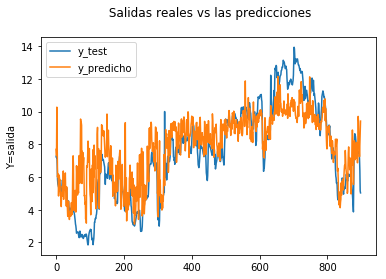

In [7]:
print(np.shape(y_test))
plt.plot(np.arange(899),y_test,np.arange(899),ypred)
plt.ylabel('Y=salida')
plt.title(u' Salidas reales vs las predicciones\n')
plt.legend(['y_test', 'y_predicho'])
plt.show()